In [1]:
from __future__ import division
import pandas as pd
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn.linear_model as lm
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.metrics import confusion_matrix, classification_report, precision_score, accuracy_score
from sklearn.model_selection import train_test_split, ShuffleSplit, cross_val_score, KFold, LeaveOneOut
from sklearn import preprocessing
from sklearn import neighbors
from sklearn.feature_selection import f_regression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures

import statsmodels.api as sm
import statsmodels.formula.api as smf



%matplotlib inline
plt.style.use('seaborn')
# pd.reset_option('all')


%cd C:\Users\yo\Documents\ML_and_Python\ML_and_Python_books\ISLR\ISLR-python\Notebooks\Data


C:\Users\yo\Documents\ML_and_Python\ML_and_Python_books\ISLR\ISLR-python\Notebooks\Data


# p-values sklearn with f_regression()

In [55]:
# the output of f_regression is F values of features and p-values of F scores
smarket = pd.read_csv('smarket.csv', index_col=0, parse_dates=True)
smarket.ix[smarket['Direction'] == 'Up', 'Direction'] = 1
smarket.ix[smarket['Direction'] == 'Down', 'Direction'] = 0
smarket['Direction'] = smarket['Direction'].astype(int)
X = smarket[['Year', 'Lag1', 'Lag2', 'Lag3', 'Lag4', 'Lag5', 'Volume']]
y = smarket['Direction']
smarket.head()
for item1, item2 in zip(X.columns, f_regression(X,y)[1]): print('p-value for:', item1, "...", item2)

smarket.

SyntaxError: invalid syntax (<ipython-input-55-309981b7c303>, line 11)

In [57]:
# loading Auto file
auto = pd.read_csv('Auto.csv', na_values='?').dropna()
X = auto[['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'year', 'origin']]
y = auto['mpg']
for item1, item2 in zip(X.columns, f_regression(X,y)[1]): print('p-value for:', item1, "...", item2)
auto.info()
                   

p-value for: cylinders ... 1.3113836371e-80
p-value for: displacement ... 1.6606418278e-90
p-value for: horsepower ... 7.03198902941e-81
p-value for: weight ... 6.01529605143e-102
p-value for: acceleration ... 1.7785761248e-18
p-value for: year ... 1.07579355642e-36
p-value for: origin ... 1.8110801808e-34
<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 396
Data columns (total 9 columns):
mpg             392 non-null float64
cylinders       392 non-null int64
displacement    392 non-null float64
horsepower      392 non-null float64
weight          392 non-null int64
acceleration    392 non-null float64
year            392 non-null int64
origin          392 non-null int64
name            392 non-null object
dtypes: float64(4), int64(4), object(1)
memory usage: 30.6+ KB


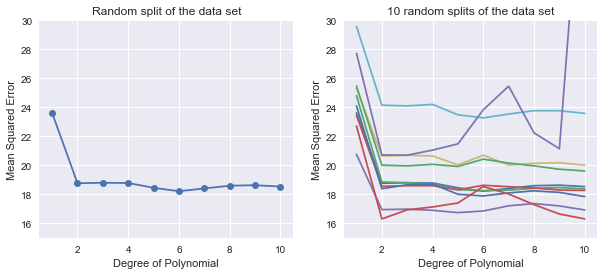

In [58]:
t_prop = 0.5
p_order = np.arange(1,11)
r_state = np.arange(0,10)

X, Y = np.meshgrid(p_order, r_state, indexing='ij')
Z = np.zeros((p_order.size,r_state.size))

regr = lm.LinearRegression()

# Generate 10 random splits of the dataset
for (i,j),v in np.ndenumerate(Z):
    poly = PolynomialFeatures(int(X[i,j]))
    X_poly = poly.fit_transform(auto.horsepower.values.reshape(-1,1))
    
    X_train, X_test, y_train, y_test = train_test_split(X_poly, auto.mpg.ravel(),
                                                        test_size=t_prop, random_state=Y[i,j])
                                                                        
    regr.fit(X_train, y_train)
    pred = regr.predict(X_test)
    Z[i,j]= mean_squared_error(y_test, pred)

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(10,4))

# Left plot (first split)
ax1.plot(X.T[0],Z.T[0], '-o')
ax1.set_title('Random split of the data set')

# Right plot (all splits)
ax2.plot(X,Z)
ax2.set_title('10 random splits of the data set')

for ax in fig.axes:
    ax.set_ylabel('Mean Squared Error')
    ax.set_ylim(15,30)
    ax.set_xlabel('Degree of Polynomial')
    ax.set_xlim(0.5,10.5)
    ax.set_xticks(range(2,11,2));

In [340]:
gspc2[gspc2['pct_change'] <= -0.27 ]


,Adj_Close,pct_change,row_filter,cum_pct_change_ndays_after,n_days_avg_return
Date,,,,,
2014-01-30,3722.500177,-0.278585,True,0.230020,-0.006004
2017-01-03,31.430000,-0.319550,True,-0.065224,-0.006004


### Stock data from yahoo finance with help of pandas datarteader
In this case Gold Futures data downloaded from Quandl

In [19]:
# stock data extraction from web
# code to select rows from a df based on certain filter criteria like pct_change > 0.007 and have as an output a df 
# with n days prior and n days after the date that corresponds to the filter
import pandas_datareader.data as web
import datetime
import itertools

# bringing stock data
start = datetime.datetime(2010, 1, 1)
end = datetime.datetime(2017, 3, 27)
gspc2 = web.DataReader("AG", 'yahoo', start, end)
gspc2.rename(columns={'Adj Close' :'Adj_Close'}, inplace=True)
gspc2.drop(['Open', 'High', 'Low', 'Close', 'Volume'], axis=1, inplace=True)
gspc2['pct_change'] = gspc2['Adj_Close'].pct_change()


# gspc2['std_dev2'] = gspc2['pct_change'].std()*2
# gspc2['pct_change_mean'] = gspc2['pct_change'].mean()

# setting filter condition
row_filter, gspc2['row_filter'] = gspc2.index[gspc2['pct_change'].between(-0.08, -0.07) ],\
                                             (gspc2['pct_change'].between(-0.08, -0.07))

# window of days before and after the selected date
n = 7

selected_rows = [(pd.date_range(i - pd.DateOffset(days=n), periods=n*2+1)) for i in row_filter]
selected_rows = list(itertools.chain.from_iterable(selected_rows))

# cumulative return n-2 days later after the day on which condition occured, without counting return on the day itself
gspc2['pct_ch_nd_after'] = gspc2.Adj_Close.shift(-(n-2))/gspc2.Adj_Close - 1
gspc2['nd_avg_ret'] = gspc2.pct_ch_nd_after.mean()

final_df = gspc2.loc[selected_rows].dropna().drop_duplicates().sort_index(ascending=False)


 
#print(row_filter)
# removing nan due to mismatch in market days vs calendar days and removing duplicates 

print(final_df)
print(final_df[final_df.row_filter])

            Adj_Close  pct_change row_filter  pct_ch_nd_after  nd_avg_ret
Date                                                                     
2016-12-16       7.22   -0.017687      False        -0.048476    0.006254
2016-12-15       7.35   -0.102564      False        -0.062585    0.006254
2016-12-14       8.19   -0.062929      False        -0.144078    0.006254
2016-12-13       8.74    0.009238      False        -0.188787    0.006254
2016-12-12       8.66   -0.014790      False        -0.183603    0.006254
2016-12-09       8.79   -0.071806       True        -0.178612    0.006254
2016-12-08       9.47   -0.038579      False        -0.223865    0.006254
2016-12-07       9.85    0.027112      False        -0.168528    0.006254
2016-12-06       9.59   -0.007246      False        -0.088634    0.006254
2016-12-05       9.66   -0.016293      False        -0.103520    0.006254
2016-12-02       9.82    0.104612      False        -0.104888    0.006254
2016-09-16      11.33   -0.028302     

In [344]:
gspc2.tail()

,Adj_Close,pct_change,row_filter,cum_pct_change_ndays_after,n_days_avg_return
Date,,,,,
2017-02-14,43.509998,0.005314,False,0.009193,0.000369
2017-02-15,44.090000,0.013330,False,-0.056929,0.000369
2017-02-16,44.110001,0.000454,False,NaN,0.000369
2017-02-17,43.910000,-0.004534,False,NaN,0.000369
2017-02-21,41.580002,-0.053063,True,NaN,0.000369


### Stock data from local csv file
In this case Gold Futures data downloaded from Quandl

In [33]:
# stock data extraction from local csv 
# code to select rows from a df based on certain filter criteria like pct_change > 0.007 and have as an output a df 
# with n days prior and n days after the date that corresponds to the filter
import pandas_datareader.data as web
import datetime
import itertools

# bringing stock data
start = datetime.datetime(2010, 1, 1)
end = datetime.datetime(2017, 3, 27)

gspc2 = pd.read_csv('C:/Users/yo/Documents/ML_and_Python/ML_and_Python_courses_videos/Sentdex/Getting SP500 Data/stock_dfs/SI1.csv', \
                   index_col=0, parse_dates=True)

gspc2.drop(['Open', 'High', 'Low', 'Change', 'Settle', 'Volume', 'Previous Day Open Interest'], axis=1, inplace=True)
gspc2['pct_change'] = gspc2['Last'].pct_change()


# gspc2['std_dev2'] = gspc2['pct_change'].std()*2
# gspc2['pct_change_mean'] = gspc2['pct_change'].mean()

# setting filter condition
row_filter, gspc2['row_filter'] = gspc2.index[gspc2['pct_change'].between(-0.036, -0.035) ],\
                                             (gspc2['pct_change'].between(-0.036, -0.035))

# window of days before and after the selected date
n = 12

selected_rows = [(pd.date_range(i - pd.DateOffset(days=n), periods=n*2+1)) for i in row_filter]
selected_rows = list(itertools.chain.from_iterable(selected_rows))

# cumulative return n-2 days later after the day on which condition occured, without counting return on the day itself
gspc2['pct_ch_nd_after'] = gspc2.Last.shift(-(n-2))/gspc2.Last - 1
gspc2['nd_avg_ret'] = gspc2.pct_ch_nd_after.mean()

final_df = gspc2.loc[selected_rows].dropna().drop_duplicates().sort_index(ascending=False)


 
#print(row_filter)
# removing nan due to mismatch in market days vs calendar days and removing duplicates 

print(final_df)
print(final_df[final_df.row_filter])

              Last  pct_change row_filter  pct_ch_nd_after  nd_avg_ret
Date                                                                  
2015-03-30  16.657    0.004584      False        -0.063397   -0.000005
2015-03-27  17.052    0.023714      False        -0.092365   -0.000005
2015-03-26  17.122    0.004105      False        -0.095141   -0.000005
2015-03-25  16.980   -0.008293      False        -0.096290   -0.000005
2015-03-24  16.963   -0.001001      False        -0.079585   -0.000005
2015-03-23  16.872   -0.005365      False        -0.066204   -0.000005
2015-03-20  16.867   -0.000296      False        -0.064208   -0.000005
2015-03-19  16.098   -0.045592      False         0.002112   -0.000005
2015-03-18  15.525   -0.035594       True         0.039098   -0.000005
2015-03-17  15.562    0.002383      False         0.044724   -0.000005
2015-03-16  15.601    0.002506      False         0.051663   -0.000005
2015-03-13  15.477   -0.007948      False         0.066938   -0.000005
2015-0

In [9]:
gspc2.head()

,Last,pct_change,row_filter
Date,,,
2017-01-03,1248.3,NaN,False
2017-02-28,1247.4,-0.000721,False
2017-02-27,1251.7,0.003447,False
2017-02-24,1256.9,0.004154,False
2017-02-23,1249.7,-0.005728,False


In [103]:
smarket = pd.read_csv('Smarket.csv', usecols=range(1,10), index_col=0, parse_dates=True)
smarket['year'] = smarket.index.to_datetime().year

# creating a numerical value from a categorical values. I could use pd.factorize() but it assigned confusing values
# 0 for positive return and 1 for negative
smarket.ix[smarket['Today'] >= 0, 'Direction'] = 1
smarket.ix[smarket['Today'] < 0, 'Direction'] = 0
smarket['Direction'] = smarket['Direction'].astype(int)
X_train2004 = smarket[:'2004'][['Lag1', 'Lag2','Lag3', 'Lag4']]
y_train2004 = smarket[:'2004']['Direction']
X_test2005 = smarket['2005 ':][['Lag1', 'Lag2','Lag3', 'Lag4']]
y_test2005 = smarket['2005':]['Direction']

KNN_smarket = neighbors.KNeighborsClassifier(n_neighbors=50)
KNN_smarket.fit(X_train2004, y_train2004)

print('Standard Confusion Matrix from sklearn:\n',confusion_matrix(y_test2005, KNN_smarket.predict(X_test2005)))
print('Classification Report:\n', classification_report(y_test2005, KNN_smarket.predict(X_test2005)))
print("Score :", KNN_smarket.score(X_test2005, y_test2005 ))
# print("Group means:\n" ,KNN_smarket.means_) # means that on average when market is down, two previous days market tends to be up
# print("Priors : ", KNN_smarket.priors_) # means that on average 49% market is down and 50% is up
# print("Coeffs :", QDA_smarket.coef_) - no coeffs in a Quadratic Function

Standard Confusion Matrix from sklearn:
 [[40 71]
 [52 89]]
Classification Report:
              precision    recall  f1-score   support

          0       0.43      0.36      0.39       111
          1       0.56      0.63      0.59       141

avg / total       0.50      0.51      0.50       252

Score : 0.511904761905


In [106]:
# 10-fold cross-validation with K=5 for KNN (the n_neighbors parameter)

scores = cross_val_score(KNN_smarket, X_test2005, y_test2005, cv=10, scoring='accuracy')
print(scores, scores.mean())

[ 0.48148148  0.52        0.56        0.64        0.56        0.6         0.56
  0.64        0.64        0.68      ] 0.588148148148


# Cross-validation example: parameter tuning

In [117]:
# search for an optimal value of K for KNN
k_range = range(1, 100)
k_scores = []
# df = pd.DataFrame()
for k in k_range:
    KNN_smarket = neighbors.KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(KNN_smarket, X_test2005, y_test2005, cv=10, scoring='accuracy')
    k_scores.append(scores.mean())
#     df['K'], df['Score'] = k, scores.mean() 
print(k_scores, max(k_scores), df.Score.max())

[0.52785185185185191, 0.47214814814814809, 0.53125925925925943, 0.49955555555555564, 0.54814814814814805, 0.51155555555555554, 0.52444444444444449, 0.50785185185185189, 0.51614814814814824, 0.50385185185185188, 0.5324444444444445, 0.51614814814814824, 0.54385185185185192, 0.51585185185185201, 0.54444444444444451, 0.52814814814814814, 0.5238518518518519, 0.52014814814814814, 0.54785185185185181, 0.5324444444444445, 0.56074074074074065, 0.58014814814814819, 0.59214814814814809, 0.57214814814814807, 0.56903703703703701, 0.55244444444444452, 0.58785185185185185, 0.57185185185185183, 0.59585185185185185, 0.57185185185185183, 0.59955555555555562, 0.57925925925925925, 0.5795555555555556, 0.5795555555555556, 0.58755555555555561, 0.57155555555555559, 0.59555555555555562, 0.5795555555555556, 0.59585185185185185, 0.57155555555555559, 0.56385185185185183, 0.55214814814814805, 0.58785185185185174, 0.57155555555555559, 0.59155555555555561, 0.57925925925925925, 0.59925925925925938, 0.5835555555555556

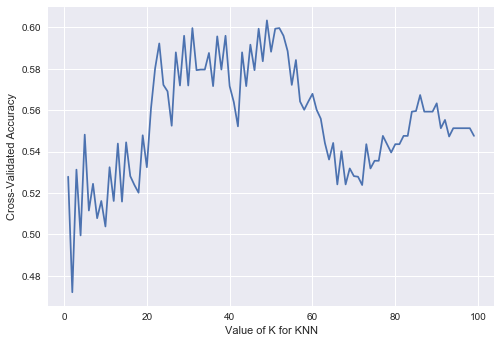

In [112]:
# plot the value of K for KNN (x-axis) versus the cross-validated accuracy (y-axis)
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')

# Cross-validation example: model selection

In [130]:
# 10-fold cross-validation with the best KNN model
knn = neighbors.KNeighborsClassifier(n_neighbors=50)
print(cross_val_score(knn, X_test2005, y_test2005, cv=10, scoring='accuracy').mean())

# 10-fold cross-validation with logistic regression
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
print(cross_val_score(logreg, X_test2005, y_test2005, cv=10, scoring='accuracy').mean())

0.588148148148
0.507851851852


# Cross-validation example: feature selection

In [143]:
# create a Python list of three feature names
feature_cols = ['Lag1', 'Lag2', 'Lag4']

# use the list to select a subset of the DataFrame (X)
X = smarket[feature_cols]

# select the Direction column as the response (y)
y = smarket.Direction
X = smarket[feature_cols]
y = smarket.Direction
logreg = LogisticRegression()
scores = cross_val_score(logreg, X, y, cv=10, scoring='neg_mean_squared_error')
print(-scores, -scores.mean())

[ 0.5         0.5         0.496       0.504       0.44        0.456       0.48
  0.464       0.48387097  0.48387097] 0.480774193548


In [144]:
# 10-fold cross-validation with two features
# with two features
feature_cols = ['Lag1', 'Lag2']
X = smarket[feature_cols]
y = smarket.Direction
logreg = LogisticRegression()
scores = cross_val_score(logreg, X, y, cv=10, scoring='neg_mean_squared_error')
print(-scores, -scores.mean())





[ 0.47619048  0.51587302  0.488       0.504       0.472       0.432       0.448
  0.464       0.48387097  0.48387097] 0.476780542755


In [150]:
# simulate splitting a dataset of 25 observations into 5 folds
from sklearn.cross_validation import KFold
kf = KFold(25, n_folds=5, shuffle=False)



# print the contents of each training and testing set
print('{} {:^61} {}'.format('Iteration', 'Training set observations', 'Testing set observations'))
for iteration, data in enumerate(kf, start=1):
#     print('{:^9} {} {:^25}'.format(iteration, data[0], data[1]))

SyntaxError: unexpected EOF while parsing (<ipython-input-150-2c5b07015f3b>, line 10)